# Notebook 20: Introduction to statistical regression
***

We'll need Numpy, Matplotlib, and scipy.stats for this notebook, so let's load them. 

In [3]:
import numpy as np 
from scipy import stats
import matplotlib.pylab as plt 
%matplotlib inline
almostblack = np.array([10,10,10])/255
mycolor = np.array([140,180,10])/255

## Exercise 1: Noisy Lines

The formula for a line is usually written as 
$$y = b+mx$$

This defines the relationship between $x$ and $y$, by multiplying $x$ by the slope $m$ and adding the intercept $b$. 

Since we can call the slope and intercept anything we want, we'll use the notation:

$$y = \alpha + \beta x$$

** Part A **: There is nothing random in the equation above. Write a function that plots this equation for $\alpha=0.5$ and $\beta=1$, on the domain $x \in [0,5]$.

In [4]:
def plot_line():
    alpha = 0.5
    beta = 1.0
    x = np.linspace(0,5,10)
    y = alpha + x*beta
    fig, ax = plt.subplots()
    line = ax.plot(x,y,color=mycolor,label="y=x+0.5")
    ax.set_xlabel("x", fontsize=16)
    ax.set_ylabel("y", fontsize=16)
    ax.set_ylim([0,6])
    ax.set_xlim([0,5])
    frame1 = plt.gca()
    plt.legend()

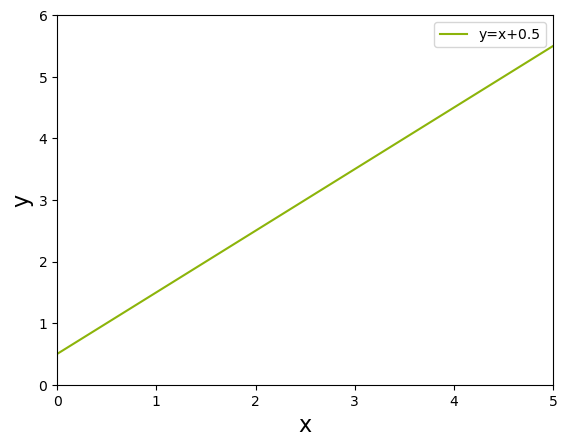

In [5]:
plot_line()

**Part B**: We have, in many courses in past years, called $x$ the independent variable and $y$ the dependent variable. Here, we'll introduce some new words: We will sometimes call $x$ the predictor or the explanatory variable. In machine learning, the vocabulary word that you may hear is that $x$ is a feature. 

On the other hand $y$, the dependent variable, may be called the response variable. 

Normally, when we plot lines, for a given independent variable $x$, there is a fixed $y$. But in real-world scenarios, we don't just get $y$ back. We often get $y$ back with _noise_.

Write a function that takes in values of $x$, $\alpha$, and $\beta$ below, and returns 
$$ y = \alpha + \beta x + \epsilon$$
where $\epsilon$ is drawn from a Normal distribution with mean of $0$ and variance of $\sigma^2$. Be sure to allow your function to take the variance as an input, too.

In [14]:
def y_noisy(a,b,x,var):
    noise = stats.norm.rvs(loc=0, scale=np.sqrt(var), size=len(x))
    return a+x*b+noise

**Part C**: Use your function from Part B to make a plot of this noise-added data, for $x \in [0,5]$, with 25 evenly spaced values. On top of these noisy values, plot the noise-free values, like you did in Part A. Looking ahead, it will be nice if you can easily change the slope, intercept, number of points, and noise levels for this plot, so please write a function that allows you to, for now, plot with the parameters discussed so far. 

In [15]:
def plot_line_noisy(var=1,alpha=1,beta=1,n_points=25):
    x = np.linspace(0,5,n_points)
    y = y_noisy(alpha,beta,x,var)
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
    ax.scatter(x,y,color=almostblack,marker='o',label="y=x+0.5+noise")
    ax.plot(x,alpha*x+beta,color=mycolor,label="y=x+0.5")
    ax.set_xlabel("x", fontsize=16)
    ax.set_ylabel("y", fontsize=16)
    plt.legend()
    

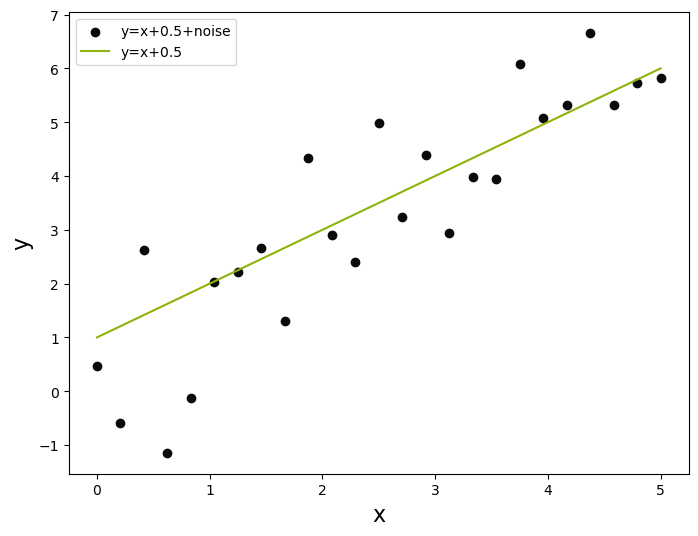

In [16]:
plot_line_noisy(var=1)

**Part D**: Slowly increase the value of the variance of the noise, and create a few more plots. Comment on what you notice.

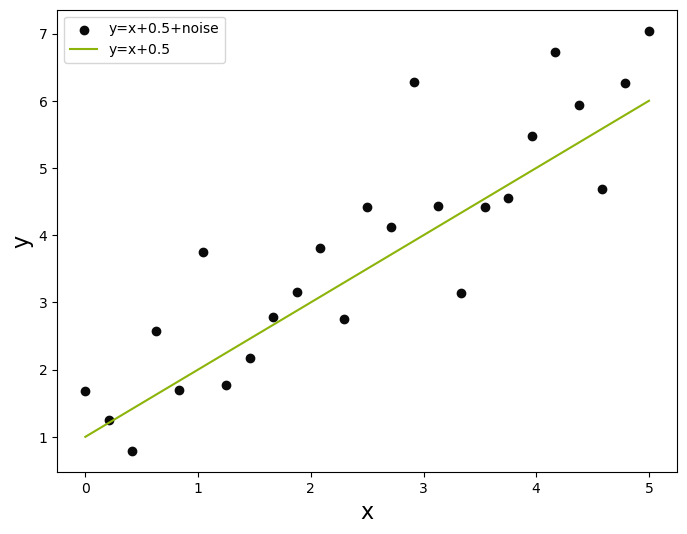

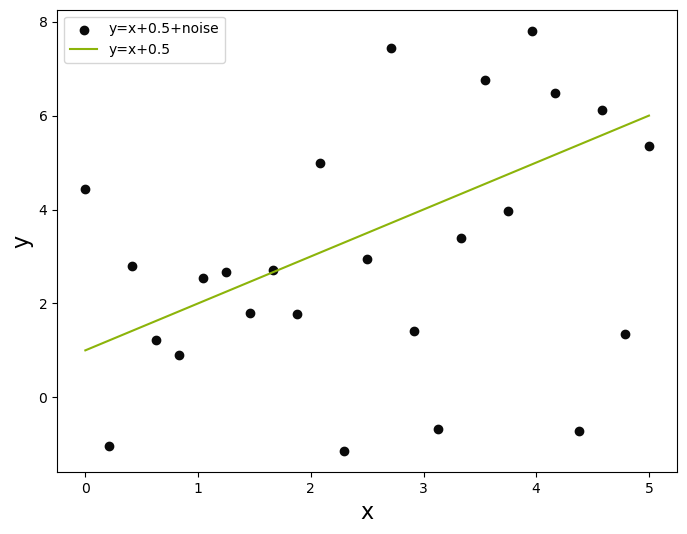

In [18]:
plot_line_noisy(var=1)
plot_line_noisy(var=4)

## Exercise 2: Repeat-o-fit

**Part A**: Code up a function that takes in sets of matched x and y values and returns the linear regression parameters $\hat{\alpha}$ and $\hat{\beta}$.

In [ ]:
def regression(x,y):
    xbar = # TODO  FILL IN FROM SLIDES
    ybar = # TODO 
    numerator = # TODO sum((x-xbar)*(y-ybar))
    denominator = # TODO sum((x-xbar)^2)
    beta = numerator/denominator
    alpha = ybar - beta*xbar
    yhat = alpha + beta*x
    return alpha,beta,yhat

**Part B**: Using your functions from Exercise 1, consider 10 equally-spaced values of x between 0 and 5, and add noise to a line with slope 2 and intercept 0.5.  Let the variance of the noise be 2. 

Then, fit the points using your function from Part A. On the same axes, create a plot of 
- the noisy points 
- your best fit line
- the original line

In [ ]:
x = # TODO
y = # TODO
ytrue = # TODO

alpha,beta,yhat = regression(x,y)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
scatter = ax.scatter(x,y,color=almostblack,marker='o',label="data")
line = ax.plot(x,yhat,color=mycolor,label="LS fit")
line2 = ax.plot(x,ytrue,color=almostblack,label="Model",linestyle='--') 
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
plt.legend()


**Part C** Repeatedly redraw your plot from Part B and note the accuracies of the slope and intercept estimates. Experiment with changing the number of points, previously set to 10. Experiment with changing the variance of the noise. What do you notice?

**Part D**: When plotting, the alpha parameter controls the transparency of the line. Use an alpha of 0.05 to plot the best-fit lines of 500 separate datasets with $\alpha=0.5$, $\beta=0.5$, $\sigma^2=2$, and $x \in [0,5]$ in 10 evenly spaced points.  

Do not plot the points used for regression; only the best-fit lines.

On top of these, plot the true line, with no noise. 

In [ ]:
# First, fit just like in part B - sample (x,y) dataset and get alpha, beta
# First.5, save those results (alpha, beta, yhat)
# Second, do this again.  And again.  And again.... (500 times)